<a href="https://colab.research.google.com/github/NoorMemonzz/Dynamic-Email-Generator-Python/blob/main/Sentiment_analysis_tone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#sentiment Analysis
#import file


from google.colab import files
import pandas as pd

# Upload the file from your local machine
uploaded = files.upload()

# Assuming the file is named 'input_updated.csv'
df = pd.read_csv('cleaned_ai_responses.csv')
print(df.head())

Saving cleaned_ai_responses.csv to cleaned_ai_responses.csv
                                         AI Response      Source language  \
0  university admissions are open apply now and s...  ChatGPT 4o       en   
1  ready to take the next step university admissi...  ChatGPT 4o       en   
2  its time university admissions are open apply ...  ChatGPT 4o       en   
3  the wait is over apply now for university admi...  ChatGPT 4o       en   
4  university admissions are open take the next s...  ChatGPT 4o       en   

                                 Cleaned AI Response  
0  university admissions are open apply now and s...  
1  ready to take the next step university admissi...  
2  its time university admissions are open apply ...  
3  the wait is over apply now for university admi...  
4  university admissions are open take the next s...  


In [ ]:
#Question1
#What is the average sentiment score for posts generated by each AI model (ChatGPT, Gemini, Claude, Pi.ai)?

!pip install vaderSentiment
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load your dataframe (assuming you already have it loaded as 'df')
# Example: df = pd.read_csv("your_data.csv")
df = pd.read_csv('cleaned_ai_responses.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Compound score gives a good overall sentiment

# Apply the sentiment analysis to the AI-generated text column
df['sentiment_score'] = df['AI Response'].apply(get_sentiment_score)

# Group by the 'Source' column (which contains AI channels) and calculate the average sentiment score
average_sentiment_per_model = df.groupby('Source')['sentiment_score'].mean()

# Print the average sentiment scores for each AI model
print(average_sentiment_per_model)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00
Source
ChatGPT 4o    0.262433
Claude        0.345172
Gemini        0.216706
Jasper        0.180529
Pi            0.621993
Name: sentiment_score, dtype: float64


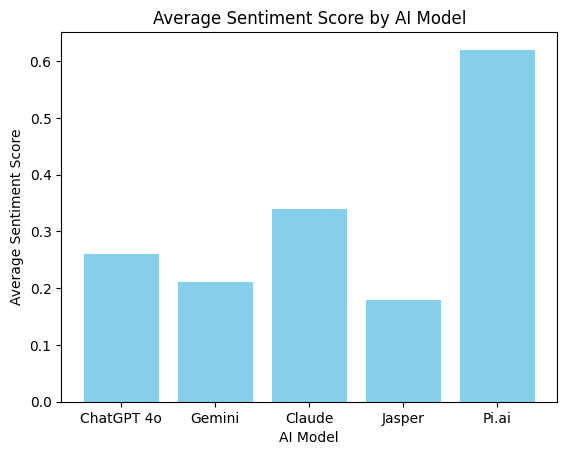

In [ ]:
## Plot the average sentiment scores for each AI model

# Install matplotlib
!pip install matplotlib

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Example: Assuming you already have a DataFrame with sentiment scores
# Create a simple DataFrame (replace this with your actual data)
data = {'AI Model': ['ChatGPT 4o', 'Gemini', 'Claude', 'Jasper','Pi.ai'],
        'Average Sentiment Score': [0.26, 0.21, 0.34, 0.18, 0.62]}

df = pd.DataFrame(data)

# Plotting the average sentiment scores
plt.bar(df['AI Model'], df['Average Sentiment Score'], color='skyblue')
plt.title('Average Sentiment Score by AI Model')
plt.xlabel('AI Model')
plt.ylabel('Average Sentiment Score')
plt.show()

In [ ]:
#Interpretation
#Based on the average sentiment scores, Pi.ai has the most positive sentiment (0.622), indicating a more favorable tone in its posts, while Jasper has the least positive sentiment (0.181), suggesting a more neutral or slightly negative tone. Claude and ChatGPT 4 also show relatively positive sentiment, with Claude being slightly more positive than ChatGPT 4.

In [ ]:
#Question2 Which AI tool (e.g., ChatGPT, Gemini, Claude, Pi.ai) generates the most positive social media content?

#Answer Based on the average sentiment scores, Pi.ai generates the most positive social media content with a sentiment score of 0.622, indicating the highest level of positivity among the AI tools.

In [ ]:
#Question 2 Which AI tool (e.g., ChatGPT, Gemini, Claude, Pi.ai) generates the most negative social media content?

#Answer Based on the average sentiment scores, Jasper generates the most negative social media content with a sentiment score of 0.181, indicating a more neutral or slightly negative tone compared to the other AI tools.

In [ ]:
#Question 5 Does sentiment correlate with the length of the social media post? (i.e., do longer posts tend to be more positive or negative?)

df = pd.read_csv('cleaned_ai_responses.csv') #to import the coulumn AI Response
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# I already have a dataframe df with AI-generated posts in a column named 'AI Response'

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Compound score is a good overall sentiment measure

# Add a column for sentiment scores
df['sentiment_score'] = df['AI Response'].apply(get_sentiment_score)

# Add a column for the length of each post (character count)
df['post_length'] = df['AI Response'].apply(len)

# Calculate the correlation between sentiment score and post length
correlation = df[['sentiment_score', 'post_length']].corr().iloc[0, 1]

# Print the correlation result
print(f"Correlation between sentiment and post length: {correlation}")

Correlation between sentiment and post length: 0.5597309007240249


In [ ]:
#Interpretation
#The correlation between sentiment and post length of 0.56 suggests a moderate positive correlation. This means that, generally, as the length of the social media posts increases, the sentiment tends to become more positive, but the relationship is not extremely strong.
#0.56 correlation indicates that longer posts are somewhat more positive in sentiment on average.
#However, 0.56 is still a moderate correlation, meaning that there are likely other factors influencing the sentiment of posts aside from just their length.

In [ ]:
#Question6 How does the sentiment of social media posts relate to specific keywords or hashtags used in the posts?

In [ ]:
#Step3---
from google.colab import files
import pandas as pd

# Upload the file from your local machine
uploaded = files.upload()

# Assuming the file is named 'input_updated.csv'
df = pd.read_csv('input_updated.csv')
print(df.head())

Saving input_updated.csv to input_updated.csv
                                         AI Response      Source
0  University admissions are open! Apply now and ...  ChatGPT 4o
1  Ready to take the next step? University admiss...  ChatGPT 4o
2  It's time! University admissions are open. App...  ChatGPT 4o
3  The wait is over! Apply now for university adm...  ChatGPT 4o
4  University admissions are open! Take the next ...  ChatGPT 4o


In [ ]:
#Step2-----
df = pd.read_csv('input_updated.csv') #to import the coulumn AI Response form the raw file becasue hashtags might have removed while cleaning
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score for each post
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # The compound score represents the overall sentiment

# Function to extract hashtags from the post text
def extract_hashtags(text):
    # Regular expression to find hashtags, assumes hashtags start with '#' and contain word characters
    return re.findall(r'#\w+', text.lower())  # Use .lower() to ensure consistency

# Assuming your DataFrame is named 'df' and the text column is 'AI Response'

# Apply sentiment analysis to the 'AI Response' column
df['sentiment_score'] = df['AI Response'].apply(get_sentiment_score)

# Extract hashtags from the 'AI Response' column (this assumes hashtags are embedded in the text)
df['hashtags'] = df['AI Response'].apply(extract_hashtags)

df = df[df['hashtags'].apply(lambda x: len(x) > 0)]  # Remove rows with empty or no hashtags

# Check the first few rows of the dataframe to ensure hashtags are correctly extracted
print(df[['AI Response', 'hashtags', 'sentiment_score']].head())

                                         AI Response                 hashtags  \
0  University admissions are open! Apply now and ...              [#applynow]   
1  Ready to take the next step? University admiss...              [#applynow]   
2  It's time! University admissions are open. App...  [#universityadmissions]   
3  The wait is over! Apply now for university adm...              [#applynow]   
4  University admissions are open! Take the next ...  [#universityadmissions]   

   sentiment_score  
0           0.0000  
1           0.4738  
2           0.0000  
3           0.0000  
4           0.0000  


In [ ]:
#Step3---
# Flatten the dataframe so that each row corresponds to a single hashtag and its sentiment score
hashtag_sentiment = []

# Loop through each row, splitting the hashtags and associating them with the sentiment score
for index, row in df.iterrows():
    for hashtag in row['hashtags']:
        hashtag_sentiment.append({'hashtag': hashtag, 'sentiment_score': row['sentiment_score']})

# Create a new DataFrame with hashtags and their corresponding sentiment scores
hashtag_df = pd.DataFrame(hashtag_sentiment)

# Group by 'hashtag' and calculate the average sentiment score
average_sentiment_by_hashtag = hashtag_df.groupby('hashtag')['sentiment_score'].mean()

# Display the results
print(average_sentiment_by_hashtag)

hashtag
#admissionsopen          0.320314
#applynow                0.343230
#applyonline             0.000000
#applytoday              0.396020
#askyourself             0.361200
                           ...   
#studentlife             0.220433
#success                 0.840667
#successstory            0.523600
#universityadmissions    0.357521
#universitylife          0.193612
Name: sentiment_score, Length: 64, dtype: float64


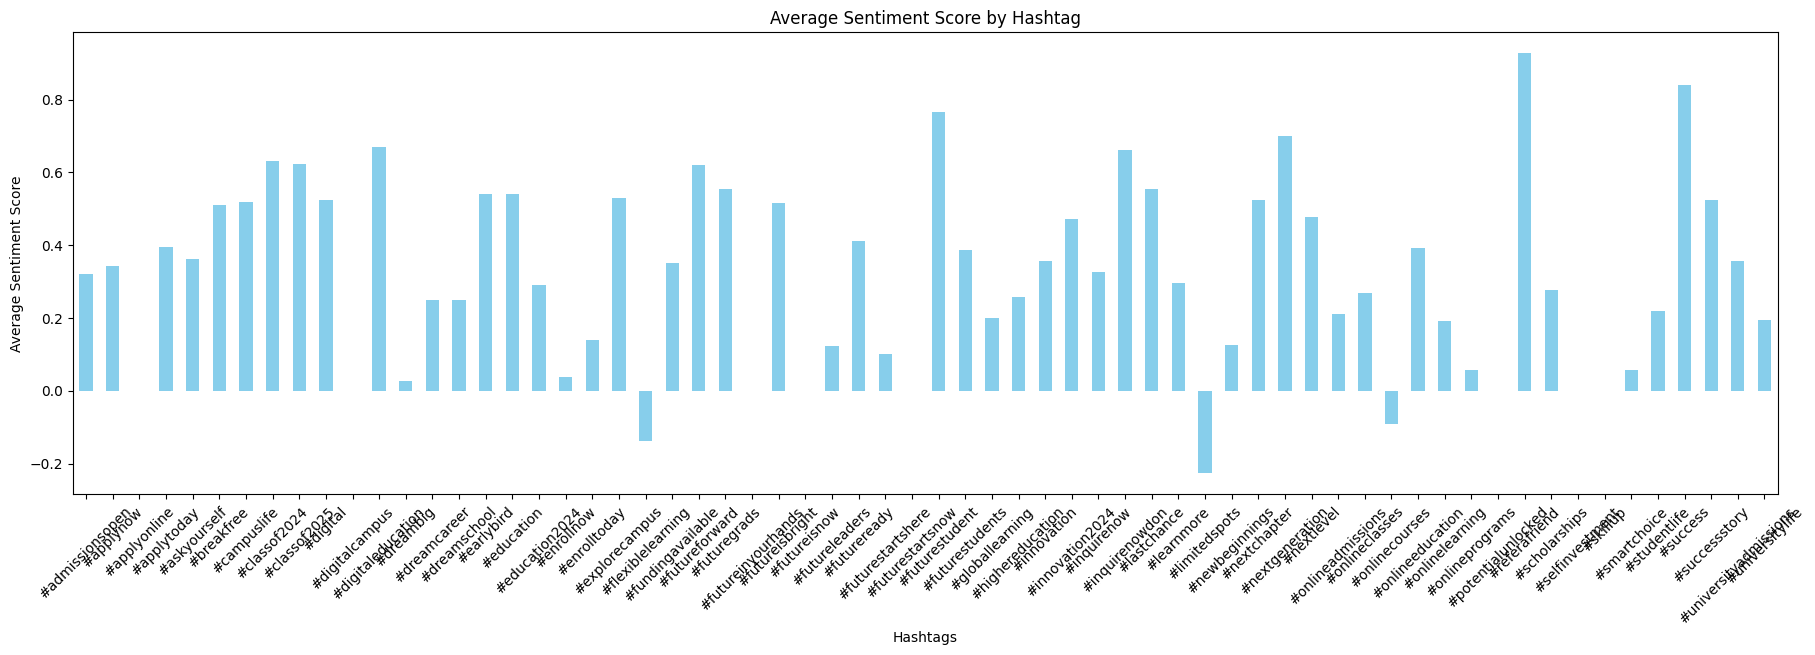

In [ ]:
#Step4---
#Visualize the results
import matplotlib.pyplot as plt

# Plot the average sentiment score for each hashtag
average_sentiment_by_hashtag.plot(kind='bar', color='skyblue', figsize=(22, 6))
plt.title('Average Sentiment Score by Hashtag')
plt.xlabel('Hashtags')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Interpretation
#The sentiment analysis reveals that posts with hashtags like #success (0.84) and #successstory (0.52) tend to have highly positive sentiment, while hashtags like #applyonline (0.00) and #studentlife (0.22) are associated with more neutral or moderately positive sentiment. This suggests that certain keywords (e.g., related to success and achievement) elicit stronger positive emotions compared to others.

In [ ]:
#Break Here --- Next I am doing NLP and BERT to detect the Tone of the text

In [ ]:
#import file


from google.colab import files
import pandas as pd

# Upload the file from your local machine
uploaded = files.upload()

# Assuming the file is named 'input_updated.csv'
df = pd.read_csv('cleaned_ai_responses_tone.csv')
print(df.head())

Saving cleaned_ai_responses_tone.csv to cleaned_ai_responses_tone.csv
                                         AI Response      Source  \
0  university admissions are open apply now and s...  ChatGPT 4o   
1  ready to take the next step university admissi...  ChatGPT 4o   
2  its time university admissions are open apply ...  ChatGPT 4o   
3  the wait is over apply now for university admi...  ChatGPT 4o   
4  university admissions are open take the next s...  ChatGPT 4o   

            tone language                                Cleaned AI Response  
0   Motivational       en  university admissions are open apply now and s...  
1    Encouraging       en  ready to take the next step university admissi...  
2         Urgent       en  its time university admissions are open apply ...  
3  Inspirational       en  the wait is over apply now for university admi...  
4       Exciting       en  university admissions are open take the next s...  


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load your actual dataset (replace with your file path)
df = pd.read_csv('cleaned_ai_responses_tone.csv')
#


# Define your tone category mapping to four categories
tone_mapping = {
    # Encouraging Tone
    'Encouraging': 'Encouraging', 'Motivating': 'Encouraging', 'Aspirational': 'Encouraging',
    'Encouraging': 'Encouraging', 'Exciting': 'Encouraging', 'Dynamic': 'Encouraging',
    'Inspiring': 'Encouraging', 'Exhilarating': 'Encouraging', 'Empowering': 'Encouraging',

    # Urgent Tone
    'Urgent': 'Urgent', 'Quick': 'Urgent', 'Timely': 'Urgent', 'Immediate': 'Urgent',
    'Rapid': 'Urgent', 'Fast': 'Urgent', 'Prompt': 'Urgent', 'Expeditious': 'Urgent',

    # Informative Tone
    'Informative': 'Informative', 'Clear': 'Informative', 'Practical': 'Informative',
    'Direct': 'Informative', 'Helpful': 'Informative', 'Educational': 'Informative',
    'Advisory': 'Informative', 'Guided': 'Informative', 'Clarified': 'Informative',

    # Supportive Tone
    'Supportive': 'Supportive', 'Reassuring': 'Supportive', 'Comforting': 'Supportive',
    'Helpful': 'Supportive', 'Empathetic': 'Supportive', 'Caring': 'Supportive',
    'Positive': 'Supportive', 'Nurturing': 'Supportive', 'Encouraging': 'Supportive'
}

# Apply the mapping to the 'Tone' column
df['Standardized_Tone'] = df['tone'].map(tone_mapping)

# Check the resulting DataFrame
print(df)

# Get the frequency of the standardized tones
tone_counts = df['Standardized_Tone'].value_counts()

print("\nTone Frequency Distribution:")
print(tone_counts)

                                            AI Response      Source  \
0     university admissions are open apply now and s...  ChatGPT 4o   
1     ready to take the next step university admissi...  ChatGPT 4o   
2     its time university admissions are open apply ...  ChatGPT 4o   
3     the wait is over apply now for university admi...  ChatGPT 4o   
4     university admissions are open take the next s...  ChatGPT 4o   
...                                                 ...         ...   
3554  hey there future innovators universityadmissio...          Pi   
3555  high school graduates its time to make your ma...          Pi   
3556  calling all grads universityadmissions are wai...          Pi   
3557  hey there future problemsolvers universityadmi...          Pi   
3558  high schools out but the world needs your pass...          Pi   

                 tone language  \
0        Motivational       en   
1         Encouraging       en   
2              Urgent       en   
3       Ins

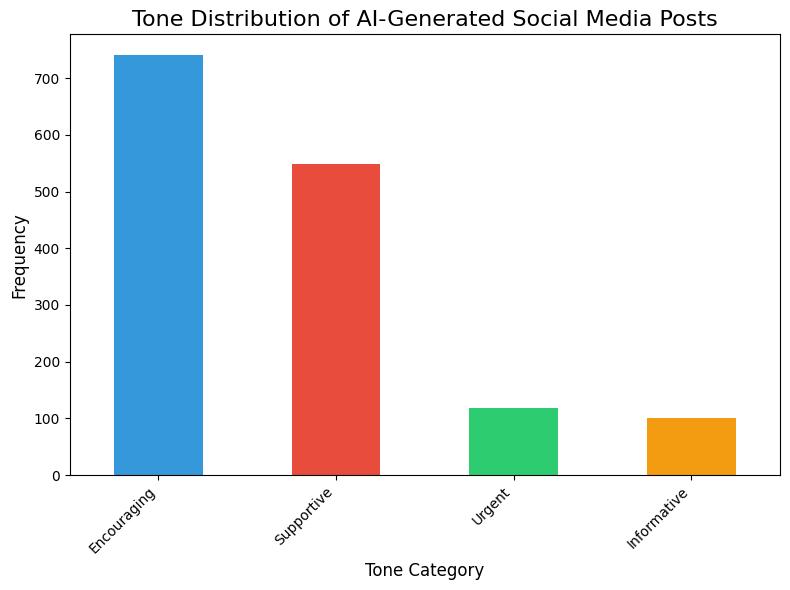

In [ ]:
#Visualizing

# Plotting the distribution
plt.figure(figsize=(8, 6))
tone_counts.plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
plt.title('Tone Distribution of AI-Generated Social Media Posts', fontsize=16)
plt.xlabel('Tone Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Which AI tool has more encouragin, supportive, urgent, adn informative tone.

# Load your actual dataset (replace with your file path)
df = pd.read_csv('cleaned_ai_responses_tone.csv')

import pandas as pd
import matplotlib.pyplot as plt

# Define your tone category mapping to four categories
tone_mapping = {
    'Encouraging': 'Encouraging', 'Motivating': 'Encouraging', 'Aspirational': 'Encouraging',
    'Exciting': 'Encouraging', 'Dynamic': 'Encouraging', 'Inspiring': 'Encouraging',
    'Exhilarating': 'Encouraging', 'Empowering': 'Encouraging',

    'Urgent': 'Urgent', 'Quick': 'Urgent', 'Timely': 'Urgent', 'Immediate': 'Urgent',
    'Rapid': 'Urgent', 'Fast': 'Urgent', 'Prompt': 'Urgent', 'Expeditious': 'Urgent',

    'Informative': 'Informative', 'Clear': 'Informative', 'Practical': 'Informative',
    'Direct': 'Informative', 'Helpful': 'Informative', 'Educational': 'Informative',
    'Advisory': 'Informative', 'Guided': 'Informative', 'Clarified': 'Informative',

    'Supportive': 'Supportive', 'Reassuring': 'Supportive', 'Comforting': 'Supportive',
    'Empathetic': 'Supportive', 'Caring': 'Supportive', 'Positive': 'Supportive',
    'Nurturing': 'Supportive'
}

# Apply the mapping to the 'Tone' column
df['Standardized_Tone'] = df['tone'].map(tone_mapping)

# Group by 'Source' (AI channel) and 'Standardized_Tone' and count the frequency of each tone
tone_by_channel = df.groupby(['Source', 'Standardized_Tone']).size().unstack(fill_value=0)

# Print the result to see the counts of each tone per AI channel
print(tone_by_channel)

Standardized_Tone  Encouraging  Informative  Supportive  Urgent
Source                                                         
ChatGPT 4o                 153           83         134      60
Claude                     166           21          35      35
Gemini                     143            0          59      22
Jasper                     368            0          52       2
Pi                         169            1           6       0


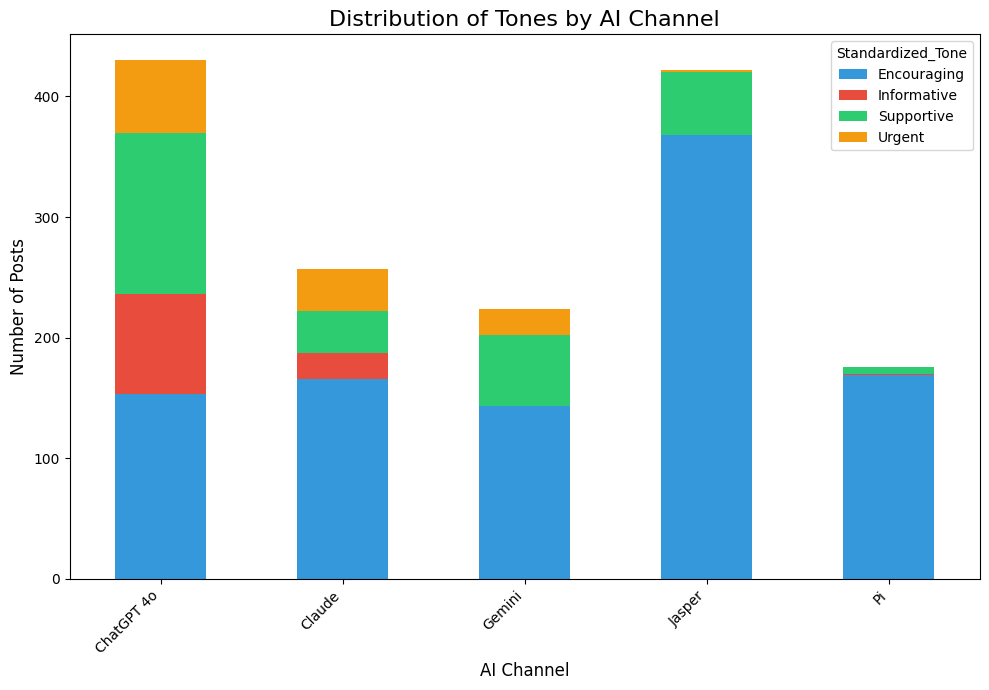

In [ ]:
#Visualizing

# Plotting the distribution of tones across different AI channels
tone_by_channel.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])

# Customize the plot
plt.title('Distribution of Tones by AI Channel', fontsize=16)
plt.xlabel('AI Channel', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)

# Set the x-ticks to show the names of the AI channels correctly
plt.xticks(ticks=range(len(tone_by_channel.index)), labels=tone_by_channel.index, rotation=45, ha='right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Question7 How does sentiment influence the tone of AI-generated posts? (e.g., Encouraging  Informative  Supportive  Urgent)

In [ ]:
#A Does a higher sentiment score correlate with more "Encouraging" or "Supportive" tones?

!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
#import file


from google.colab import files
import pandas as pd

# Upload the file from your local machine
uploaded = files.upload()

# Assuming the file is named 'input_updated.csv'
df = pd.read_csv('cleaned_ai_responses_tone.csv')
print(df.head())

Saving cleaned_ai_responses_tone.csv to cleaned_ai_responses_tone.csv
                                         AI Response      Source  \
0  university admissions are open apply now and s...  ChatGPT 4o   
1  ready to take the next step university admissi...  ChatGPT 4o   
2  its time university admissions are open apply ...  ChatGPT 4o   
3  the wait is over apply now for university admi...  ChatGPT 4o   
4  university admissions are open take the next s...  ChatGPT 4o   

            tone language                                Cleaned AI Response  
0   Motivational       en  university admissions are open apply now and s...  
1    Encouraging       en  ready to take the next step university admissi...  
2         Urgent       en  its time university admissions are open apply ...  
3  Inspirational       en  the wait is over apply now for university admi...  
4       Exciting       en  university admissions are open take the next s...  


In [4]:
# Install NLTK (if not already installed)
!pip install nltk

# Download the vader_lexicon explicitly
import nltk
nltk.download('vader_lexicon')

# Import the SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create DataFrame (Make sure the CSV file exists and is accessible)
import pandas as pd
df = pd.read_csv('cleaned_ai_responses_tone.csv')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Compound score is the overall sentiment score

# Apply sentiment function to each text in the 'AI Response' column
df['Sentiment_Score'] = df['AI Response'].apply(get_sentiment_score)

# Check the unique tone values to make sure we are grouping correctly
print(df['tone'].unique())  # This will display all unique values in the 'tone' column

# Group by 'tone' and calculate the average sentiment score for each tone category
average_sentiment_by_tone = df.groupby('tone')['Sentiment_Score'].mean()

# Display the average sentiment score by tone
print(average_sentiment_by_tone)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


['Motivational' 'Encouraging' 'Urgent' 'Inspirational' 'Exciting'
 'Informative' 'encouraging' 'inviting' 'Enthusiastic' 'Inviting'
 'Optimistic' 'Supportive' 'Empowering' 'Opportunity-focused' 'Reassuring'
 'Inclusive' 'Dynamic' 'Aspiring' 'Empathetic' 'Exhilarating' 'Positive'
 'Friendly' 'Warm' 'Ready' 'Easy' 'Actionable' 'Accessible'
 'Freedom-focused' 'Comfortable' 'Community-oriented' 'Personalized'
 'Excited' 'Flexible' 'Inspiring' 'Motivating' 'Action-oriented'
 'Convenient' 'Engaging' 'Limitless' 'Challenging' 'Ambitious' 'Confident'
 'Adventurous' 'Dreamy' 'Seizing' 'Curious' 'Global' 'Courageous'
 'Passionate' 'Memorable' 'Community-focused' 'Vibrant' 'Fun' 'Grateful'
 'Opportunistic' 'Energetic' 'Bright' 'Goal-oriented' 'Transformative'
 'Lifelong learning' 'Determined' 'Opportunity' 'Hopeful' 'Growth'
 'Aspirational' 'Achievable' 'Confidence' 'Starting' 'Possibility'
 'Guiding' 'Proactive' 'Connected' 'Seize' 'Goal-Oriented'
 'Self-Investment' 'Innovative' 'Exclusive' 'Lim

In [5]:
#Mapping tone to categories (Encouraging, Informative, supportive, and urgent)

import pandas as pd

# Example list of tones
tones = [
    'Motivational', 'Encouraging', 'Urgent', 'Inspirational', 'Exciting',
    'Informative', 'encouraging', 'inviting', 'Enthusiastic', 'Inviting',
    'Optimistic', 'Supportive', 'Empowering', 'Opportunity-focused', 'Reassuring',
    'Inclusive', 'Dynamic', 'Aspiring', 'Empathetic', 'Exhilarating', 'Positive',
    'Friendly', 'Warm', 'Ready', 'Easy', 'Actionable', 'Accessible',
    'Freedom-focused', 'Comfortable', 'Community-oriented', 'Personalized',
    'Excited', 'Flexible', 'Inspiring', 'Motivating', 'Action-oriented',
    'Convenient', 'Engaging', 'Limitless', 'Challenging', 'Ambitious', 'Confident',
    'Adventurous', 'Dreamy', 'Seizing', 'Curious', 'Global', 'Courageous',
    'Passionate', 'Memorable', 'Community-focused', 'Vibrant', 'Fun', 'Grateful',
    'Opportunistic', 'Energetic', 'Bright', 'Goal-oriented', 'Transformative',
    'Lifelong learning', 'Determined', 'Opportunity', 'Hopeful', 'Growth',
    'Aspirational', 'Achievable', 'Confidence', 'Starting', 'Possibility',
    'Guiding', 'Proactive', 'Connected', 'Seize', 'Goal-Oriented',
    'Self-Investment', 'Innovative', 'Exclusive', 'Limited', 'Futuristic',
    'Timely', 'Visionary', 'Uplifting', 'Direct', 'Transformational', 'Bold',
    'Practical', 'Informational', 'Discovery', 'Guidance', 'Discover',
    'Action-Oriented', 'Prompt', 'Immediate', 'Assured', 'Pragmatic',
    'Exhortative', 'Anticipatory', 'Clear', 'Helpful', 'Advisory', 'Enabling',
    'Guided', 'Simple', 'Effortless', 'Streamlined', 'Smooth', 'Quick', 'Instant',
    'Fast', 'Open', 'Welcoming', 'Hassle-free', 'Available', 'Easy-going',
    'Seamless', 'Efficient', 'Forward-looking', 'Assuring', 'Adaptable',
    'Possible', 'Unrestricted', 'Remote', 'Easygoing', 'Relaxed', 'Smart', 'Modern',
    'Forward-thinking', 'Progressive', 'Secure', 'Upbeat', 'Eager', 'Relieved',
    'Exploratory', 'Thrilling', 'Community', 'Affirming', 'Promising',
    'Liberating', 'Revolutionary', 'Groundbreaking', 'Pioneering', 'Expansive',
    'Tech-savvy', 'Trailblazing', 'Boundless', 'Creative', 'Immersive',
    'Revolutionizing', 'Cosmic', 'Interdimensional', 'Igniting', 'Elevating',
    'Soaring', 'Achieving', 'Empowered', 'Historic', 'Continuing', 'Building',
    'Impactful', 'Endless', 'Problem-solving', 'Purposeful'
]

# Define tone categories mapping
tone_mapping = {
    'Motivational': 'Encouraging',
    'Encouraging': 'Encouraging',
    'Inspirational': 'Encouraging',
    'Exciting': 'Encouraging',
    'enthusiastic': 'Encouraging',
    'Inviting': 'Encouraging',
    'Optimistic': 'Encouraging',
    'Empowering': 'Encouraging',
    'Exhilarating': 'Encouraging',
    'Positive': 'Encouraging',
    'Friendly': 'Encouraging',
    'Warm': 'Encouraging',
    'Action-Oriented': 'Encouraging',
    'Motivating': 'Encouraging',
    'Inspiring': 'Encouraging',
    'Action-oriented': 'Encouraging',
    'Excited': 'Encouraging',
    'Vibrant': 'Encouraging',
    'Aspiring': 'Encouraging',
    'Ambitious': 'Encouraging',
    'Courageous': 'Encouraging',
    'Passionate': 'Encouraging',
    'Impactful': 'Encouraging',

    'Supportive': 'Supportive',
    'Empathetic': 'Supportive',
    'Reassuring': 'Supportive',
    'Inclusive': 'Supportive',
    'Community-oriented': 'Supportive',
    'Friendly': 'Supportive',
    'Grateful': 'Supportive',
    'Helpfulness': 'Supportive',
    'Guidance': 'Supportive',
    'Guiding': 'Supportive',
    'Supportive': 'Supportive',
    'Encouraging': 'Supportive',
    'Eager': 'Supportive',
    'Affirming': 'Supportive',

    'Informative': 'Informative',
    'Informational': 'Informative',
    'Clear': 'Informative',
    'Direct': 'Informative',
    'Practical': 'Informative',
    'Discovery': 'Informative',
    'Guidance': 'Informative',
    'Advisory': 'Informative',
    'Helpful': 'Informative',
    'Simple': 'Informative',
    'Timely': 'Informative',
    'Clear': 'Informative',

    'Urgent': 'Urgent',
    'Timely': 'Urgent',
    'Quick': 'Urgent',
    'Immediate': 'Urgent',
    'Fast': 'Urgent',
    'Instant': 'Urgent',
    'Seamless': 'Urgent',
    'Expedited': 'Urgent',
    'Prompt': 'Urgent',
    'Swift': 'Urgent',
}

# Map tones to their categories
mapped_tones = [tone_mapping.get(tone, 'Unknown') for tone in tones]

# Convert to DataFrame for easier visualization
df_tones = pd.DataFrame({
    'tone': tones,
    'Mapped_Tone': mapped_tones
})

# Display the results
print(df_tones)

                tone  Mapped_Tone
0       Motivational  Encouraging
1        Encouraging   Supportive
2             Urgent       Urgent
3      Inspirational  Encouraging
4           Exciting  Encouraging
..               ...          ...
157         Building      Unknown
158        Impactful  Encouraging
159          Endless      Unknown
160  Problem-solving      Unknown
161       Purposeful      Unknown

[162 rows x 2 columns]


In [6]:
#

# Map tones to their categories
df['Mapped_Tone'] = df['tone'].map(tone_mapping)

# Group by Mapped_Tone and calculate the average sentiment score for each category
average_sentiment_by_category = df.groupby('Mapped_Tone')['Sentiment_Score'].mean()

# Display the average sentiment score by category
print(average_sentiment_by_category)

Mapped_Tone
Encouraging    0.300131
Informative    0.280263
Supportive     0.314065
Urgent         0.234348
Name: Sentiment_Score, dtype: float64


In [8]:
#A Does a higher sentiment score correlate with more "Encouraging" or "Supportive" tones?
#Interpret --- Supportive tones have the highest average sentiment score (0.314065), followed closely by Encouraging tones (0.300131).
#Yes, higher sentiment scores seem to correlate with more "Supportive" and "Encouraging" tones. Both Supportive and Encouraging tones have higher sentiment scores compared to Urgent and Informative tones.
#Supportive tones, in particular, have the highest sentiment score, which suggests that content intended to offer support, reassurance, or positive guidance tends to be perceived more positively than other types of tones.#
#This is consistent with expectations, #as Encouraging and Supportive tones generally aim to uplift and motivate, which can evoke more positive sentiment from readers.

In [9]:
#Urgent tones have the lowest average sentiment score (0.234348), and Informative tones are also relatively low (0.280263).Urgent tones, by nature, might feel more directive or pushy, which could lead to more neutral or even negative sentiment scores.#Informative tones are usually neutral or factual, which might result in lower sentiment scores as they don't aim to evoke strong emotional responses.

In [10]:
#Higher sentiment scores do seem to correlate with more encouraging and supportive tones, confirming that positive, uplifting, and supportive content tends to generate more positive sentiment, while urgent or informational content may have less emotional impact.

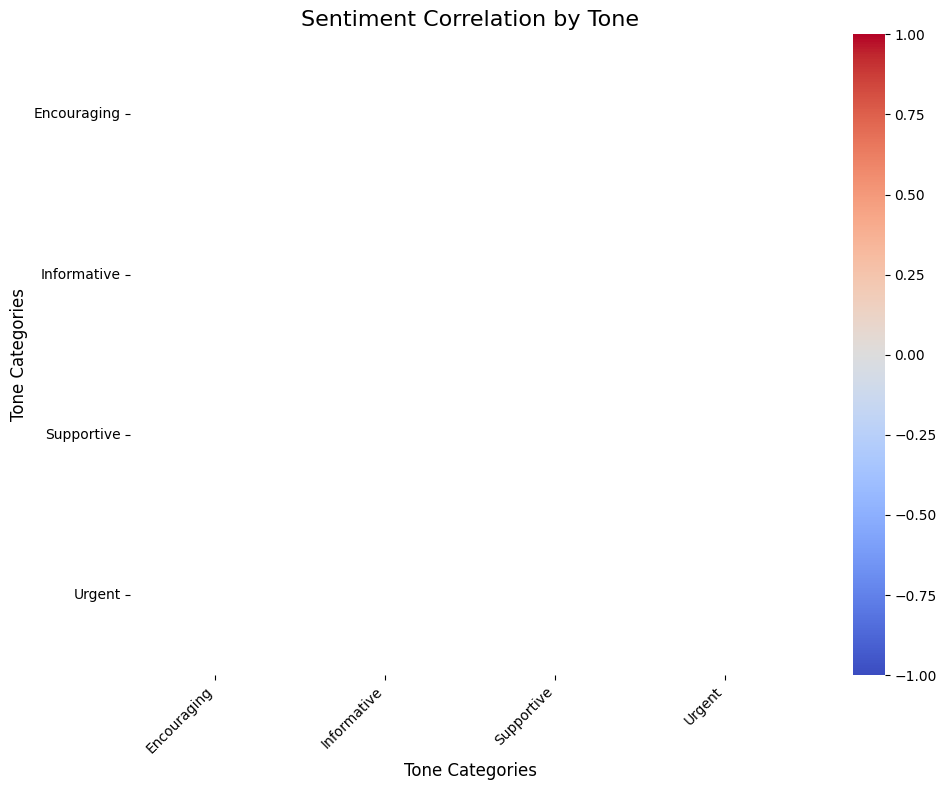

In [17]:
#Visualizing through seaborn heatmap display

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_sentiment is your DataFrame with 'Tone' and sentiment scores
sentiment_matrix = df_sentiment.set_index('Tone').T  # Transpose for easy visualization

# Create a larger plot
plt.figure(figsize=(10, 8))  # Increase the size for better readability

# Plot the correlation matrix
sns.heatmap(sentiment_matrix.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)

# Title and labels
plt.title('Sentiment Correlation by Tone', fontsize=16)
plt.xlabel('Tone Categories', fontsize=12)
plt.ylabel('Tone Categories', fontsize=12)

# Rotate the labels if necessary (use rotation for better readability)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to avoid overlap
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Use tight layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()